In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from pyro import clear_param_store
import pyro as pyro
import pyro.contrib.gp as gp
from pyro.nn import PyroSample
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS, Predictive,HMC
import torch
import arviz as az
from scipy.optimize import curve_fit
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.palettes import Spectral
from bokeh.models import Slope, Div
from bokeh.io import curdoc
from bokeh.layouts import column,gridplot
from sklearn.metrics import r2_score
from seaborn import clustermap
from bokeh.models import Band, ColumnDataSource
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from bokeh.models import LogColorMapper
from bokeh.plotting import figure, show

In [3]:
train=pd.read_excel(r"chem_train_pm.xlsx")
test=pd.read_excel(r"chem_test_pm.xlsx")

In [5]:
x=torch.linspace(0,train.corrected_week.max(),1000)
X=[]
X_std=[]
for _ in range(5):
    clear_param_store()
    rbf = gp.kernels.RBF(input_dim=1)
    
    
    rbf.variance = PyroSample(dist.HalfNormal(torch.tensor(10.)))
    
    rbf.lengthscale = PyroSample(dist.HalfNormal(torch.tensor(10.)))
    X_train_pm=torch.tensor(train.corrected_week.values).float()
    y_train_pm=torch.tensor(train.pm25_Gaussion.values).float()
    gpr = gp.models.GPRegression(X_train_pm,y_train_pm, rbf)
    gpr.noise = PyroSample(dist.HalfNormal(torch.tensor(20.)))
    
    
    nuts_kernel = NUTS(gpr.model)
    
    
    mcmc = MCMC(nuts_kernel,warmup_steps=3000, num_samples=1000,num_chains=4)
    
    mcmc.run()
    X.append(gpr(x)[0].detach().numpy())
    X_std.append(gpr(x)[1].detach().numpy())

Sample: 100%|█████████████████████████████████████| 5000/5000 [1:13:44,  1.13it/s, step size=7.99e-01, acc. prob=0.914]


In [4]:
X=pd.read_excel("Robustness.xlsx",index_col=0)

In [8]:
data=pd.DataFrame(np.array(X))

In [10]:
#data.to_excel("Robustness.xlsx")

<Axes: >

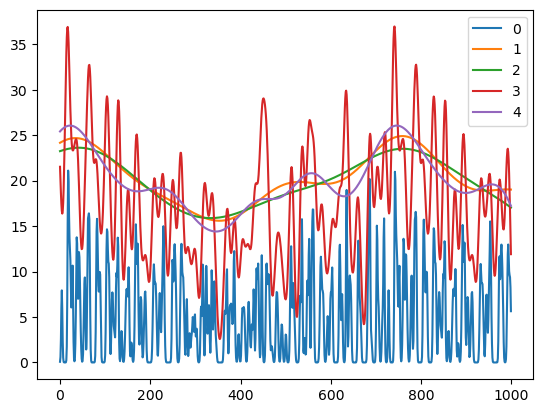

In [12]:
data.plot()

In [14]:
hest=[]
for i in range(5):
    for j in range(5):
        hest.append(np.sqrt(np.mean((data.loc[:,i]-data.loc[:,j])**2)))

NameError: name 'sns' is not defined

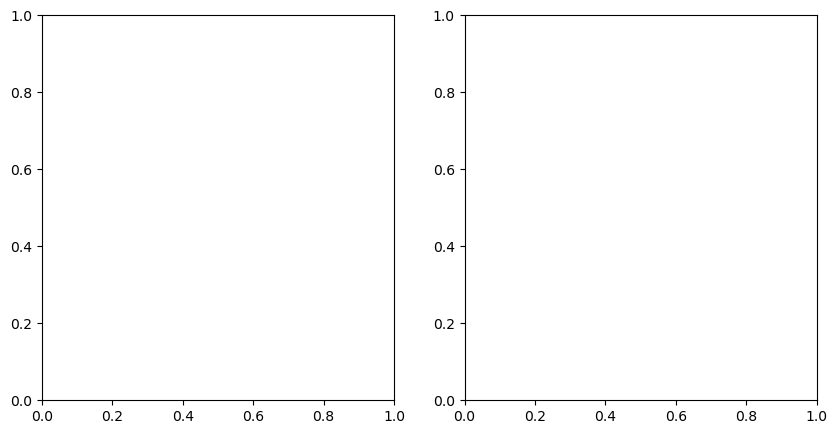

In [16]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.heatmap(np.array(hest).reshape(5,5),ax=ax[0],annot=True)
sns.heatmap(data.corr(),ax=ax[1],annot=True)
fig.savefig("performence_model.png")

In [18]:
size=np.array([100,250, 500,750,1000])

In [20]:
data23=pd.concat([train,test],axis=1)

In [26]:
from kennard_stone import train_test_split

In [22]:
i=10

In [28]:
train.columns

Index(['Unnamed: 0', 'bnr', 'flow', 'pm_final', 'sv_final', 'maalnr',
       'constrution_year', 'Area', 'floor_level', 'powerplant', 'road',
       'motorway', 'forest', 'coastline', 'airport', 'farmland', 'industrial',
       'carpet', 'cookerhood', 'passive', 'gastove', 'fireplace', 'week',
       'month', 'year', 'day', 'corrected_week', 'label', 'BC_Gaussion',
       'BC_linear', 'BC_exp', 'BC_log', 'pm25_Gaussion', 'pm25_linear',
       'pm25_exp', 'pm25_log'],
      dtype='object')

2025-03-26 10:13:21,645 - kennard_stone.utils._pairwise:109[INFO] - Calculating pairwise distances using scikit-learn.

2025-03-26 10:13:21,704 - kennard_stone.utils._pairwise:109[INFO] - Calculating pairwise distances using scikit-learn.



In [32]:
y_test

1574    11.299052
1572    29.124985
1569     8.996164
1566    47.828026
1565    41.169292
1563    14.820996
1562    11.905982
1561    12.433058
1559    34.247204
1558    18.501574
Name: pm25_Gaussion, dtype: float64

In [42]:
X_size=[]
X_size_std=[]
x=torch.linspace(0,52.5,1000)
for i in size:
    X_train, X_test, y_train, y_test = train_test_split(train.loc[:,["corrected_week","passive"]], train.pm25_Gaussion, test_size=i)
    clear_param_store()
    rbf = gp.kernels.RBF(input_dim=1)
    rbf.variance = PyroSample(dist.HalfNormal(torch.tensor(20.)))
    rbf.lengthscale = PyroSample(dist.HalfNormal(torch.tensor(20.)))
    X_train_pm=torch.tensor(X_test.corrected_week.values).float()
    y_train_pm=torch.tensor(y_test.values).float()
    gpr = gp.models.GPRegression(X_train_pm,y_train_pm, rbf)
    gpr.noise = PyroSample(dist.HalfNormal(torch.tensor(20.)))
    nuts_kernel = NUTS(gpr.model)
    mcmc = MCMC(nuts_kernel,warmup_steps=3000, num_samples=1000,num_chains=4)
    
    mcmc.run()
    X_size.append(gpr(x)[0].detach().numpy())
    X_size_std.append(gpr(x)[1].detach().numpy())

2025-03-26 10:17:18,035 - kennard_stone.utils._pairwise:109[INFO] - Calculating pairwise distances using scikit-learn.

2025-03-26 10:17:18,075 - kennard_stone.utils._pairwise:109[INFO] - Calculating pairwise distances using scikit-learn.

Sample: 100%|███████████████████████████████████████| 4000/4000 [01:16, 52.24it/s, step size=7.28e-01, acc. prob=0.913]
2025-03-26 10:18:35,143 - kennard_stone.utils._pairwise:109[INFO] - Calculating pairwise distances using scikit-learn.

2025-03-26 10:18:35,174 - kennard_stone.utils._pairwise:109[INFO] - Calculating pairwise distances using scikit-learn.

Sample: 100%|███████████████████████████████████████| 4000/4000 [02:13, 30.06it/s, step size=6.46e-01, acc. prob=0.923]
2025-03-26 10:20:48,799 - kennard_stone.utils._pairwise:109[INFO] - Calculating pairwise distances using scikit-learn.

2025-03-26 10:20:48,833 - kennard_stone.utils._pairwise:109[INFO] - Calculating pairwise distances using scikit-learn.

Sample: 100%|███████████████████████████

In [137]:
data_size.loc[]

,100,250,500,750,1000
0,0.078211,24.166204,23.244150,21.526096,25.413364
1,0.599748,24.195013,23.261538,20.036077,25.469013
2,2.557681,24.223259,23.278601,18.628244,25.522299
3,6.048367,24.250599,23.295296,17.459160,25.573153
4,7.931235,24.277161,23.311621,16.669394,25.621546
...,...,...,...,...,...
995,10.056920,19.032265,17.185421,20.751249,17.674498
996,9.617707,19.029800,17.149084,18.861933,17.567207
997,9.380014,19.026199,17.112486,16.667477,17.456547
998,8.241644,19.022398,17.075569,14.288797,17.343582


In [45]:
data_size=pd.DataFrame(np.array(X),columns=size.astype(str))

In [47]:
hest_size=[]
for i in data_size.columns:
    for j in data_size.columns:
        hest_size.append(np.sqrt(np.mean((data_size.loc[:,i]-data_size.loc[:,j])**2)))

<Axes: >

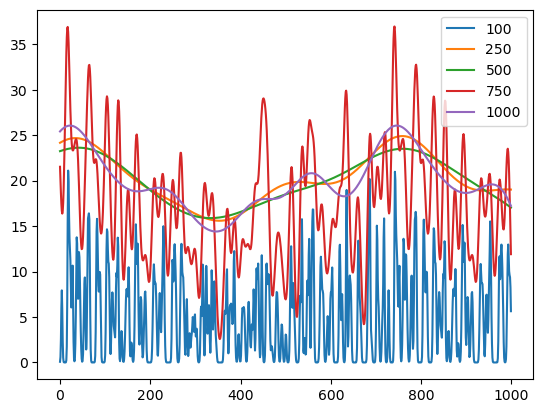

In [49]:
data_size.plot()

In [53]:
import seaborn as sns

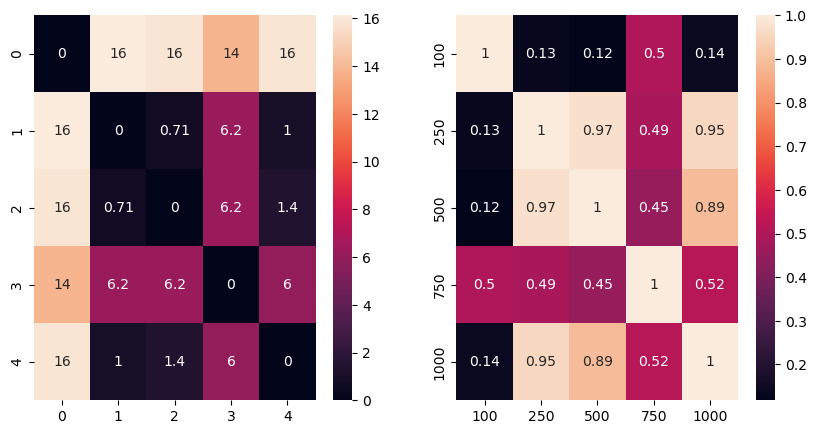

In [55]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.heatmap(np.array(hest_size).reshape(5,5),ax=ax[0],annot=True)
sns.heatmap(data_size.corr(),ax=ax[1],annot=True)
fig.savefig("performence_model_size.png")